# Setup

## Imports

In [7]:
using Pkg
Pkg.activate("SCC", shared=true)


import QuantumToolbox as qt
using Logging
import CairoMakie as cm
using MiniLoggers
using Revise
using Dates

using RecursiveArrayTools
using Tensors
using ProgressLogging

import LsqFit

import JSON3
import CSV

using IJulia
if isdefined(Main, :IJulia)
    Main.IJulia.stdio_bytes[] = 0;
end

  Activating project at `~/.julia/environments/SCC`


0

In [8]:
import SuperconductingCavities as SC

## Logger Setups

In [9]:
# MiniLogger(minlevel = MiniLoggers.Info) |> global_logger
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(ProgressLogger)

MiniLogger{MiniLoggers.Squash, VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}, VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}, DateFormat{Symbol("yyyy-mm-dd HH:MM:SS"), Tuple{Dates.DatePart{'y'}, Dates.Delim{Char, 1}, Dates.DatePart{'m'}, Dates.Delim{Char, 1}, Dates.DatePart{'d'}, Dates.Delim{Char, 1}, Dates.DatePart{'H'}, Dates.Delim{Char, 1}, Dates.DatePart{'M'}, Dates.Delim{Char, 1}, Dates.DatePart{'S'}}}, typeof(string)}(VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(16) open, 0 bytes waiting)), VSCodeServer.io_send_callback), VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(18) open, 0 bytes waiting)), VSCodeServer.io_send_callback), Error, LogLevel(-1), Dict{Any, Int64}(), true, MiniLoggers.Token[MiniLoggers.Token("[", MiniLoggers

# Loading Model

In [10]:
Mode3 = SC.Circuits.Transmon_Resonators.load("ModelSaves/Mode3/Mode3.json");
proj_dict = SC.Utils.Get_Projection_Ops(Mode3.dressed_states);

## Defining Pulse Sequences

In [11]:
Mode3.Stuff["op_drive_params"]

Dict{String, Any} with 22 entries:
  "q_ef_3"           => Dict{String, Any}("pulse_time"=>93.125, "Envelope Args"…
  "sb_f1g2_2pi_f3g4" => Dict{String, Any}("pulse_time"=>910.084, "Envelope Args…
  "q_half_ge0"       => Dict{String, Any}("pulse_time"=>92.9688, "Envelope Args…
  "q_ef_2"           => Dict{String, Any}("pulse_time"=>92.9688, "Envelope Args…
  "q_ge_2"           => Dict{String, Any}("pulse_time"=>92.9688, "Envelope Args…
  "sb_f2g3"          => Dict{String, Any}("pulse_time"=>123.609, "Envelope Args…
  "q_ge_1/2"         => Dict{String, Any}("pulse_time"=>92.9688, "Envelope Args…
  "sb_f0g1_4pi_f3g4" => Dict{String, Any}("pulse_time"=>1492.92, "Envelope Args…
  "sb_half_f1g2"     => Dict{String, Any}("pulse_time"=>80.4375, "Envelope Args…
  "sb_f1g2"          => Dict{String, Any}("pulse_time"=>148.613, "Envelope Args…
  "q_half_ef0"       => Dict{String, Any}("pulse_time"=>92.9688, "Envelope Args…
  "q_ef_1/2"         => Dict{String, Any}("pulse_time"=>92.9688, "Envelope

In [12]:
Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"] = ["q_ef_0", "q_ge_0", "sb_f0g1", "q_ge_1/2", "q_ef_1", "q_ge_0", "sb_half_f1g2", "q_ge_1", "q_ef_3/2", "sb_f2g3", "q_ge_4/3", "sb_f0g1", "q_ef_3/2", "sb_f0g1_4pi_f3g4", "q_ge_1/2", "sb_f3g4", "q_ef_1", "sb_f1g2_2pi_f3g4"]

18-element Vector{String}:
 "q_ef_0"
 "q_ge_0"
 "sb_f0g1"
 "q_ge_1/2"
 "q_ef_1"
 "q_ge_0"
 "sb_half_f1g2"
 "q_ge_1"
 "q_ef_3/2"
 "sb_f2g3"
 "q_ge_4/3"
 "sb_f0g1"
 "q_ef_3/2"
 "sb_f0g1_4pi_f3g4"
 "q_ge_1/2"
 "sb_f3g4"
 "q_ef_1"
 "sb_f1g2_2pi_f3g4"

In [ ]:
#SC.Save_Model(Mode3)

## Binomial Encoding

### Defining Pulse Sequence

In [13]:
Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"] = ["q_ef_0", "q_ge_0", "sb_f0g1", "q_ge_1/2", "q_ef_1", "q_ge_0", "sb_half_f1g2", "q_ge_1", "q_ef_3/2", "sb_f2g3", "q_ge_4/3", "sb_f0g1", "q_ef_3/2", "sb_f0g1_4pi_f3g4", "q_ge_1/2", "sb_f3g4", "q_ef_1", "sb_f1g2_2pi_f3g4"]

18-element Vector{String}:
 "q_ef_0"
 "q_ge_0"
 "sb_f0g1"
 "q_ge_1/2"
 "q_ef_1"
 "q_ge_0"
 "sb_half_f1g2"
 "q_ge_1"
 "q_ef_3/2"
 "sb_f2g3"
 "q_ge_4/3"
 "sb_f0g1"
 "q_ef_3/2"
 "sb_f0g1_4pi_f3g4"
 "q_ge_1/2"
 "sb_f3g4"
 "q_ef_1"
 "sb_f1g2_2pi_f3g4"

### Encoding $|0,0\rangle$

#### Running

In [14]:
(100,2)[2]

2

In [30]:
ψi = Mode3.dressed_states[(1,0)]#+Mode3.dressed_states[(1,0)]
ψi = ψi/qt.norm(ψi)
res_g = SC.Dynamics.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"][1:1], Return = true, clean_up = true, spns = 1);

The Name for this run is: Operator_Sequence_Tue-Nov-26-24.14.52
It is being saved at: Data/
[2024-11-26 14:52:38] Info: Running operator q_ef_0
[2024-11-26 14:52:38] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-26 14:52:40] Info: Time Evolution Complete
[2024-11-26 14:52:40] Info: Saving Steps
[2024-11-26 14:52:41] Info: Done with Step_1
[2024-11-26 14:52:41] Info: Done With Running Sequence
[2024-11-26 14:52:41] Info: Loading Data


#### Looking at Results

In [31]:
EVs_g = SC.Utils.Get_EVs(res_g["states"], proj_dict);

[2024-11-26 14:52:41] Info: Making Plot


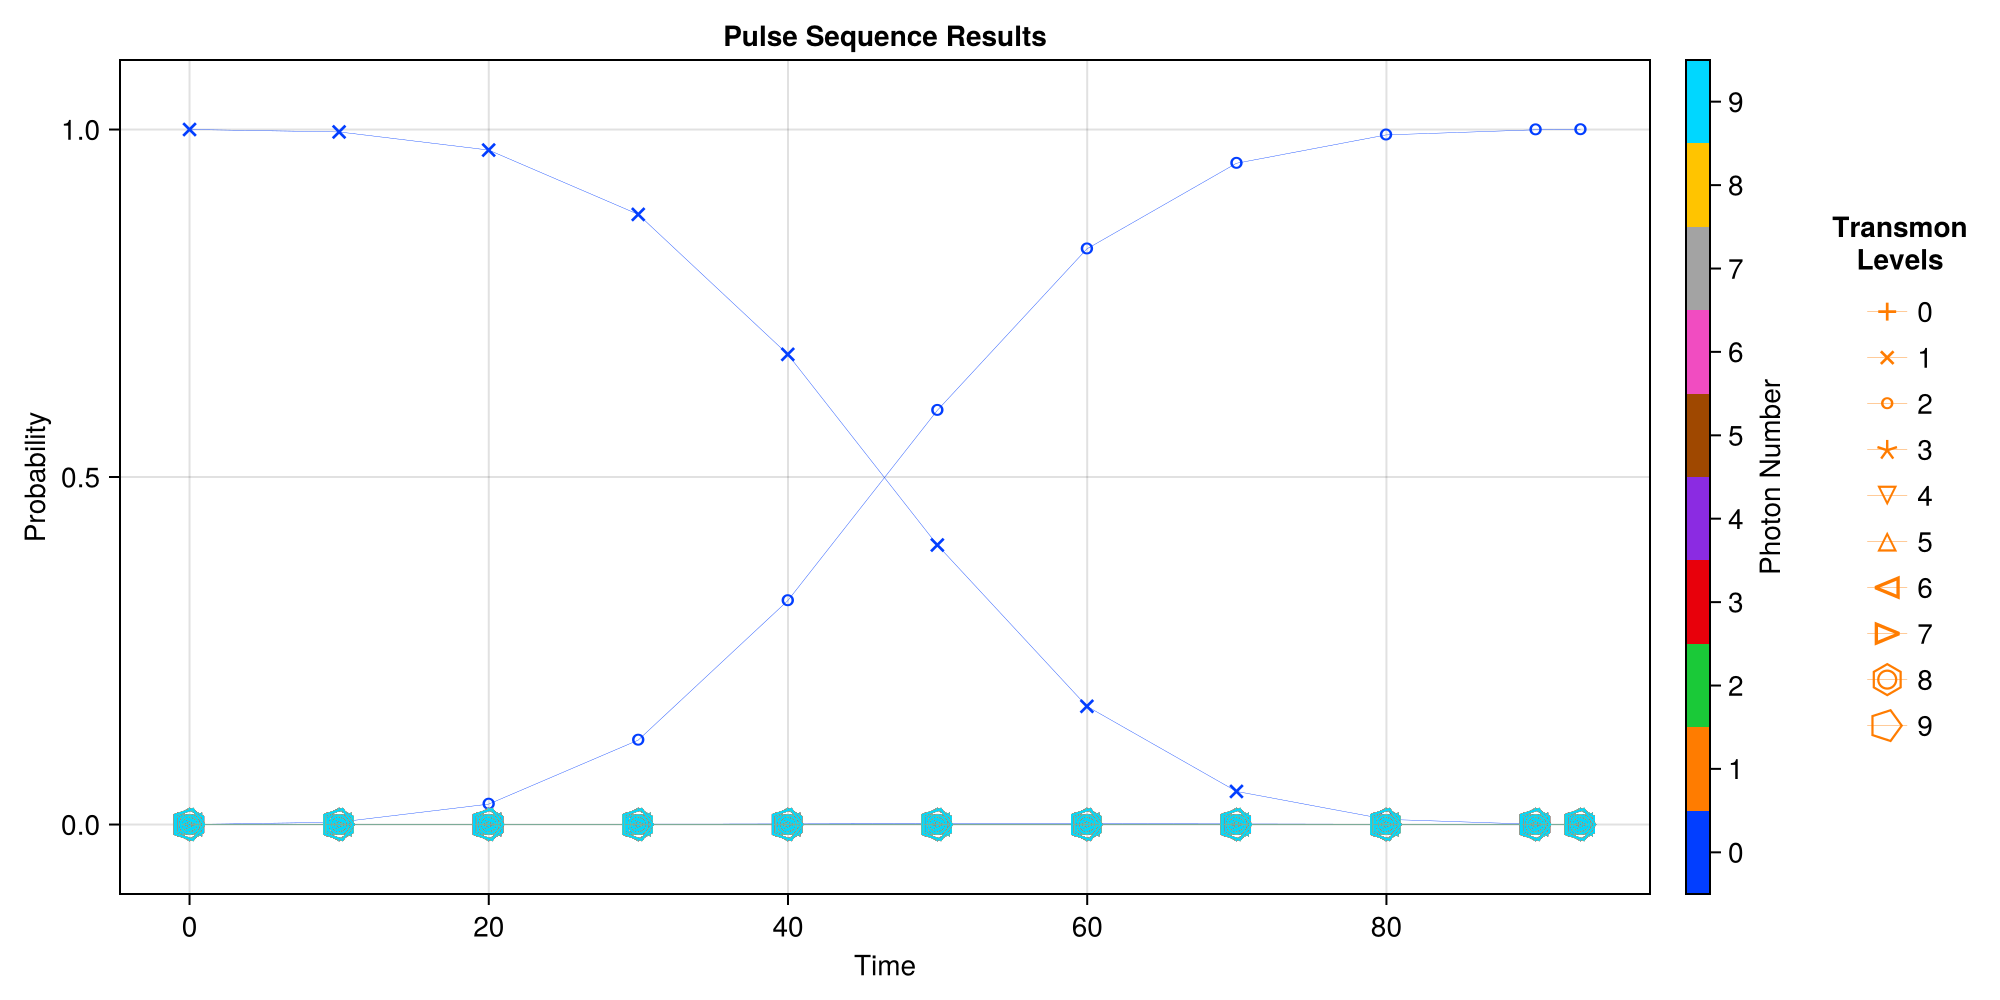

CairoMakie.Screen{IMAGE}


In [32]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, res_g["times"], EVs_g, plot_every = 10)

In [70]:
println("Prob of |00>: $(EVs_g[(0,0)][end])")
println("Prob of |02>: $(EVs_g[(0,2)][end])")
println("Prob of |04>: $(EVs_g[(0,4)][end])")
println(EVs_g[(0,4)][end]+EVs_g[(0,0)][end]+EVs_g[(0,2)][end])

Prob of |00>: 0.0013891176194708286 + 4.334762242866701e-20im
Prob of |02>: 0.9920766706353938 + 8.461597972794402e-17im
Prob of |04>: 5.1322715017888296e-5 - 4.100962078279317e-22im
0.9935171109698826 + 8.465891725416485e-17im


### Encoding $|1,0\rangle$

#### Running

In [ ]:
ψi = Mode3.dressed_states[(1,0)]#+Mode3.dressed_states[(1,0)]
ψi = ψi/qt.norm(ψi)
res_e = SC.Dynamics.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true)

The Name for this run is: Operator_Sequence_Thu-Nov-21-24.23.25
It is being saved at: Data/
[2024-11-21 23:25:56] Info: Running operator q_ef_0
[2024-11-21 23:25:56] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-21 23:25:59] Info: Time Evolution Complete
[2024-11-21 23:25:59] Info: Saving Steps
[2024-11-21 23:25:59] Info: Done with Step_1
[2024-11-21 23:25:59] Info: Running operator q_ge_0
[2024-11-21 23:25:59] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-21 23:26:02] Info: Time Evolution Complete
[2024-11-21 23:26:02] Info: Saving Steps
[2024-11-21 23:26:03] Info: Done with Step_2
[2024-11-21 23:26:03] Info: Running operator sb_f0g1
[2024-11-21 23:26:03] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 05s (ETA: 0h 00m 00s)
[2024-11-21 23:26:08] Info: Tim

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.199933, 0.399866, 0.599798, 0.799731, 0.999664, 1.1996…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

#### Looking at Results

In [ ]:
EVs_e = SC.Utils.Get_EVs(res_e["states"], proj_dict);

[2024-11-21 23:27:57] Info: Making Plot


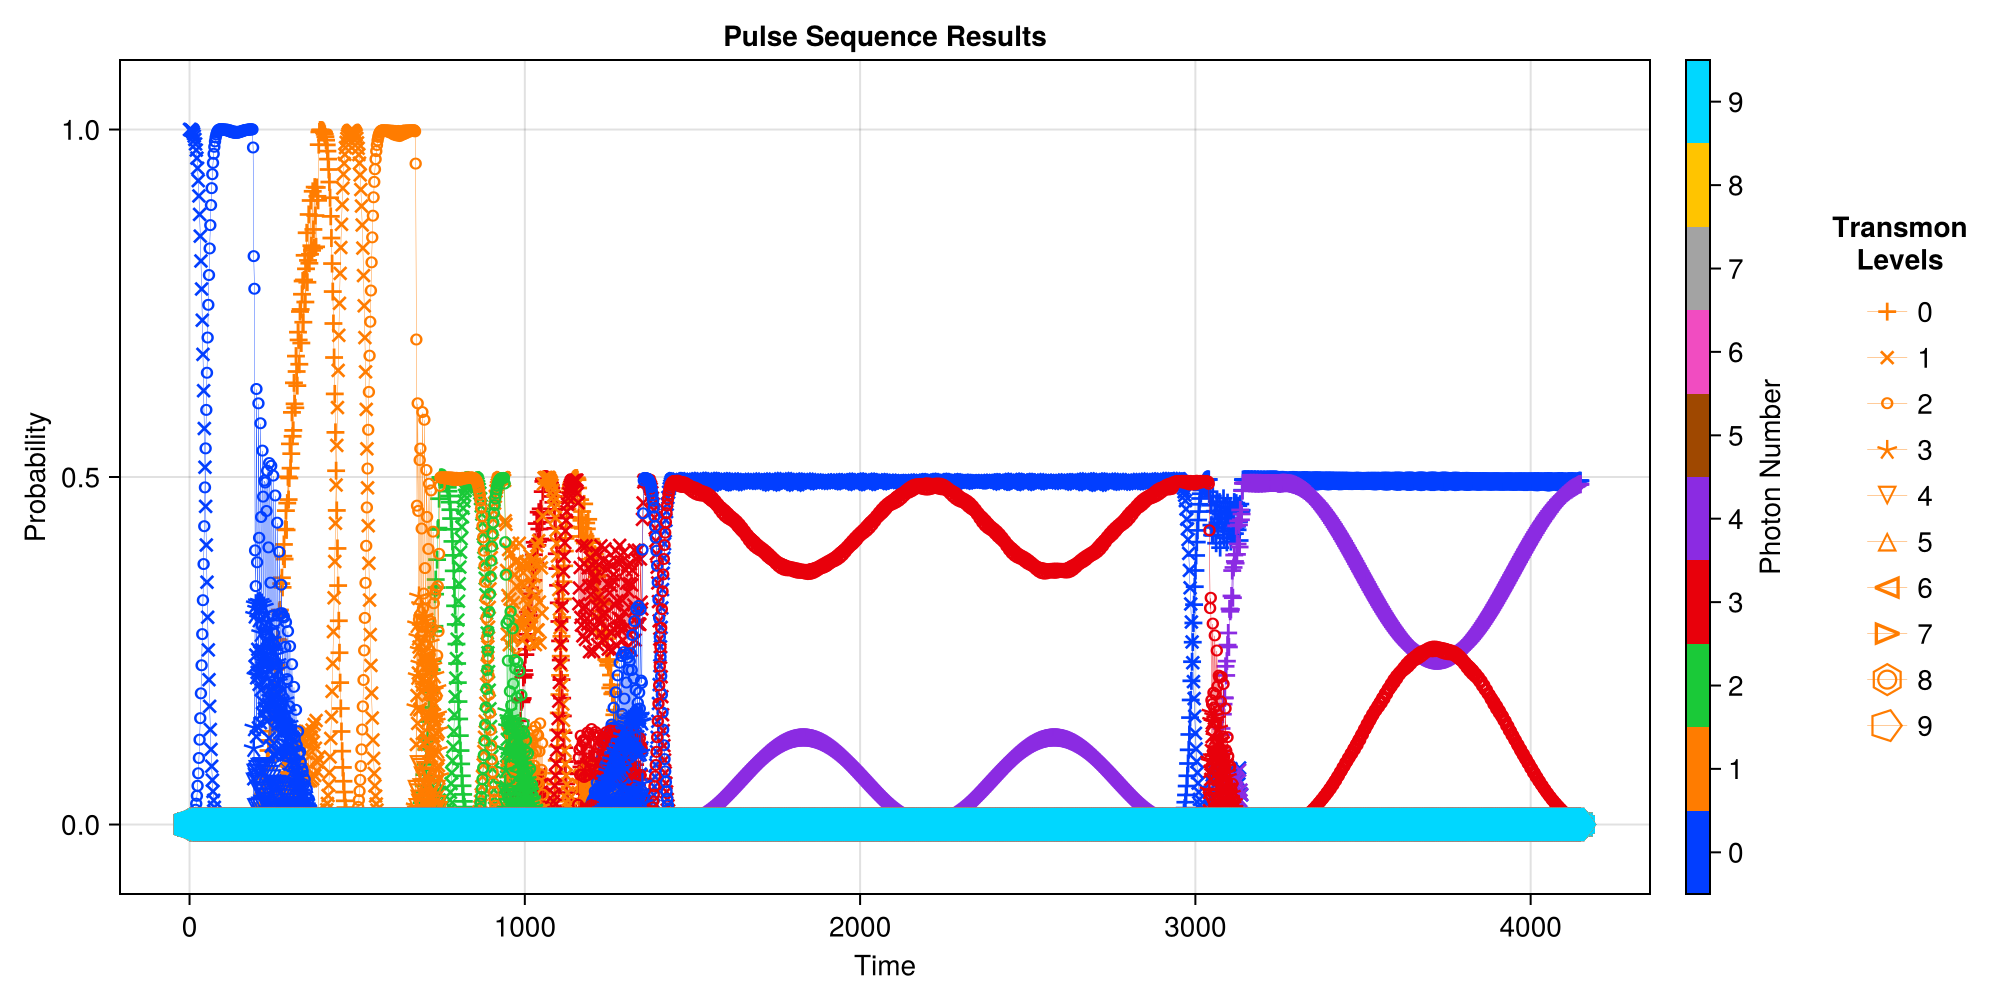

CairoMakie.Screen{IMAGE}


In [ ]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, res_e["times"], EVs_e, plot_every = 10)

In [ ]:
println("Prob of |00>: $(EVs_e[(0,0)][end])")
println("Prob of |02>: $(EVs_e[(0,2)][end])")
println("Prob of |04>: $(EVs_e[(0,4)][end])")
println(EVs_e[(0,4)][end]+EVs_e[(0,0)][end]+EVs_e[(0,2)][end])

Prob of |00>: 0.49458531269548445 - 3.7638325291580555e-17im
Prob of |02>: 0.0009680159615578505 - 4.013051485070643e-20im
Prob of |04>: 0.4895793158750305 + 6.613149151258478e-17im
0.9851326445320728 + 2.845303570615352e-17im


### Encoding $|0,0\rangle+|1,0\rangle$

#### Running

In [ ]:
ψi = Mode3.dressed_states[(0,0)]+Mode3.dressed_states[(1,0)]
ψi = ψi/qt.norm(ψi)
res_g_p_e = SC.Dynamics.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true)

The Name for this run is: Operator_Sequence_Thu-Nov-21-24.23.28
It is being saved at: Data/
[2024-11-21 23:28:16] Info: Running operator q_ef_0
[2024-11-21 23:28:16] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:28:18] Info: Time Evolution Complete
[2024-11-21 23:28:18] Info: Saving Steps
[2024-11-21 23:28:18] Info: Done with Step_1
[2024-11-21 23:28:18] Info: Running operator q_ge_0
[2024-11-21 23:28:18] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:28:20] Info: Time Evolution Complete
[2024-11-21 23:28:20] Info: Saving Steps
[2024-11-21 23:28:21] Info: Done with Step_2
[2024-11-21 23:28:21] Info: Running operator sb_f0g1
[2024-11-21 23:28:21] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-21 23:28:23] Info: Tim

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.199933, 0.399866, 0.599798, 0.799731, 0.999664, 1.1996…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

#### Looking at Results

In [ ]:
EVs_g_p_e = SC.Utils.Get_EVs(res_g_p_e["states"], proj_dict);

[2024-11-21 23:29:45] Info: Making Plot


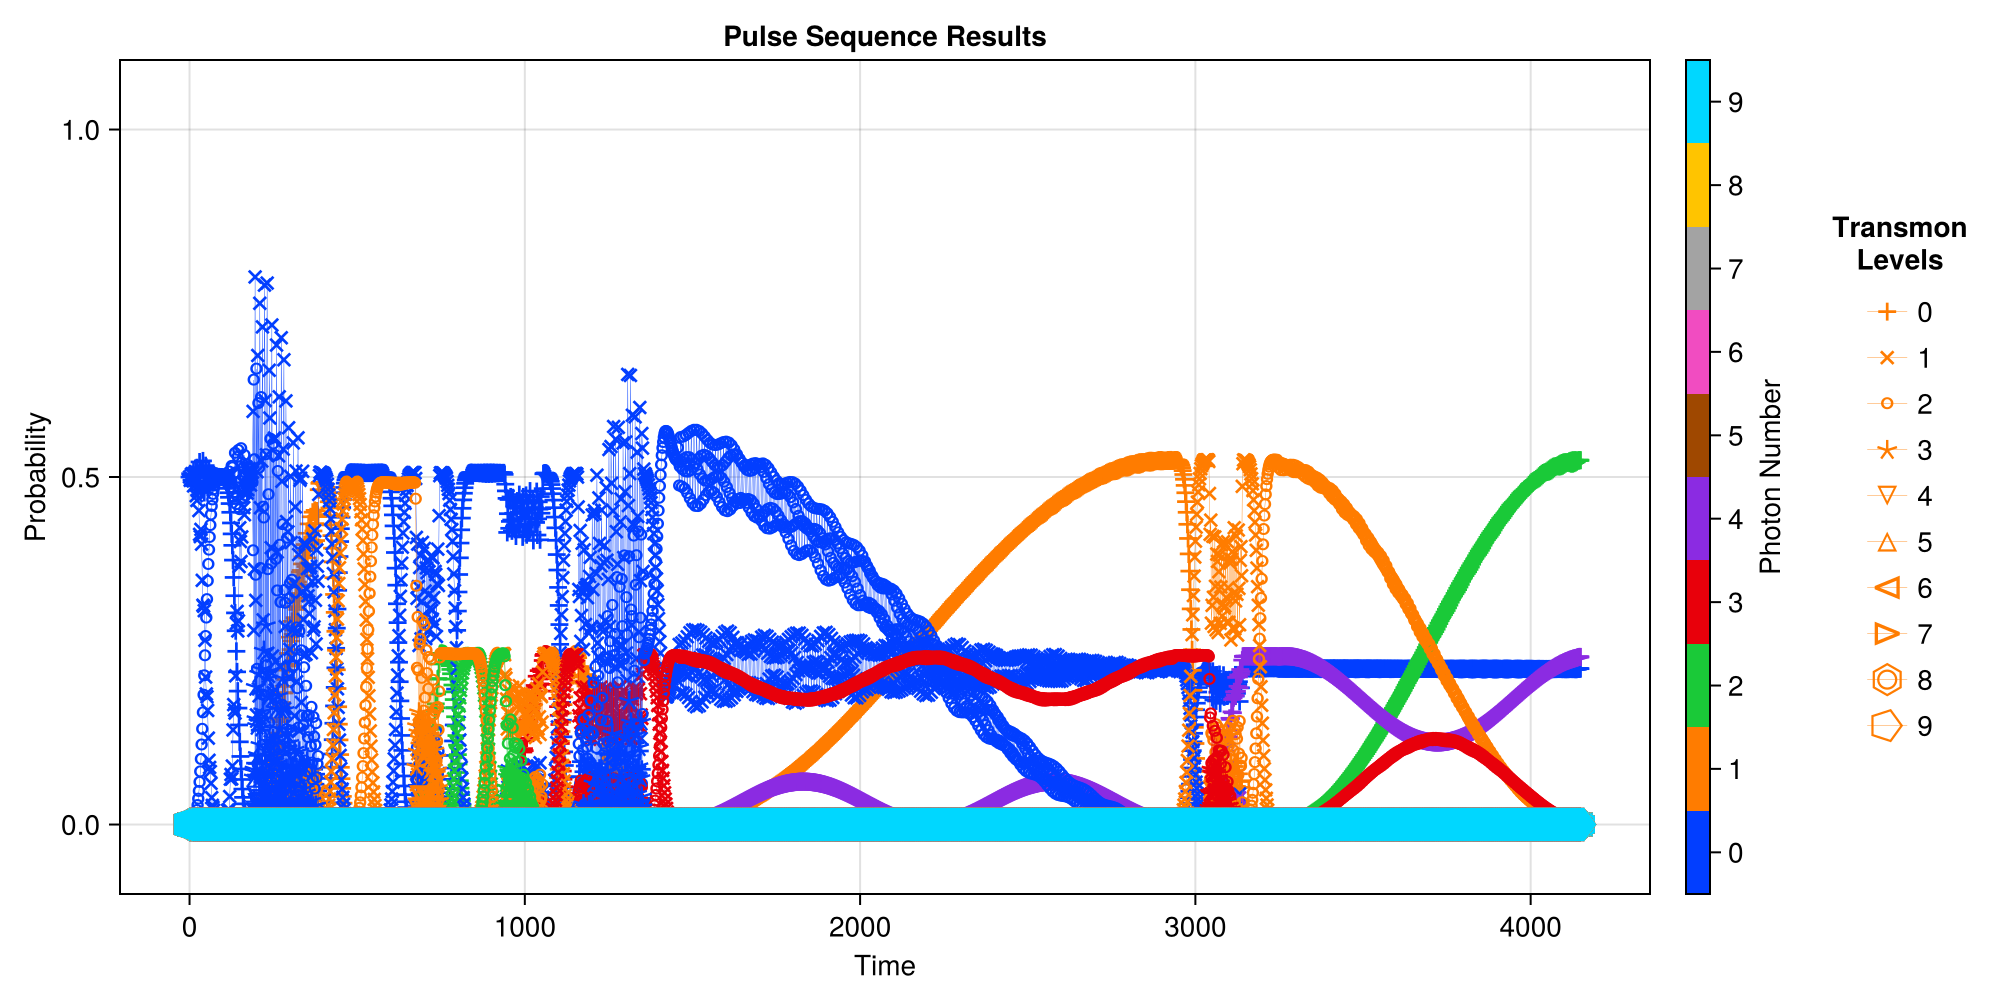

CairoMakie.Screen{IMAGE}


In [ ]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, res_g_p_e["times"], EVs_g_p_e, plot_every = 10)

In [ ]:
println("Prob of |00>: $(EVs_g_p_e[(0,0)][end])")
println("Prob of |02>: $(EVs_g_p_e[(0,2)][end])")
println("Prob of |04>: $(EVs_g_p_e[(0,4)][end])")

ψtarget = (Mode3.dressed_states[(0,0)]+Mode3.dressed_states[(0,4)])/sqrt(2)+Mode3.dressed_states[(0,2)]
ψtarget = ψtarget/qt.norm(ψtarget)
dm = ψtarget*ψtarget'

println("Fidelity: $(qt.fidelity(dm, res_g_p_e["states"][end]))")

println(EVs_g_p_e[(0,4)][end]+EVs_g_p_e[(0,0)][end]+EVs_g_p_e[(0,2)][end])

Prob of |00>: 0.2242448510883157 - 4.765605044372687e-17im
Prob of |02>: 0.5241478473440454 + 1.5219439966634062e-17im
Prob of |04>: 0.24116522747383687 - 2.3159568621783575e-17im
Fidelity: 0.5226961984559975
0.989557925906198 - 5.559617909887639e-17im


### Encoding $|0,0\rangle-|1,0\rangle$

#### Running

In [ ]:
ψi = Mode3.dressed_states[(0,0)]-Mode3.dressed_states[(1,0)]
ψi = ψi/qt.norm(ψi)
res_g_m_e = SC.Dynamics.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true)

The Name for this run is: Operator_Sequence_Thu-Nov-21-24.23.30
It is being saved at: Data/
[2024-11-21 23:30:03] Info: Running operator q_ef_0
[2024-11-21 23:30:03] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:30:04] Info: Time Evolution Complete
[2024-11-21 23:30:04] Info: Saving Steps
[2024-11-21 23:30:04] Info: Done with Step_1
[2024-11-21 23:30:04] Info: Running operator q_ge_0
[2024-11-21 23:30:04] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:30:05] Info: Time Evolution Complete
[2024-11-21 23:30:05] Info: Saving Steps
[2024-11-21 23:30:06] Info: Done with Step_2
[2024-11-21 23:30:06] Info: Running operator sb_f0g1
[2024-11-21 23:30:06] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-21 23:30:09] Info: Tim

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.199933, 0.399866, 0.599798, 0.799731, 0.999664, 1.1996…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

#### Looking at Results

In [ ]:
EVs_g_m_e = SC.Utils.Get_EVs(res_g_m_e["states"], proj_dict);

[2024-11-21 23:31:33] Info: Making Plot


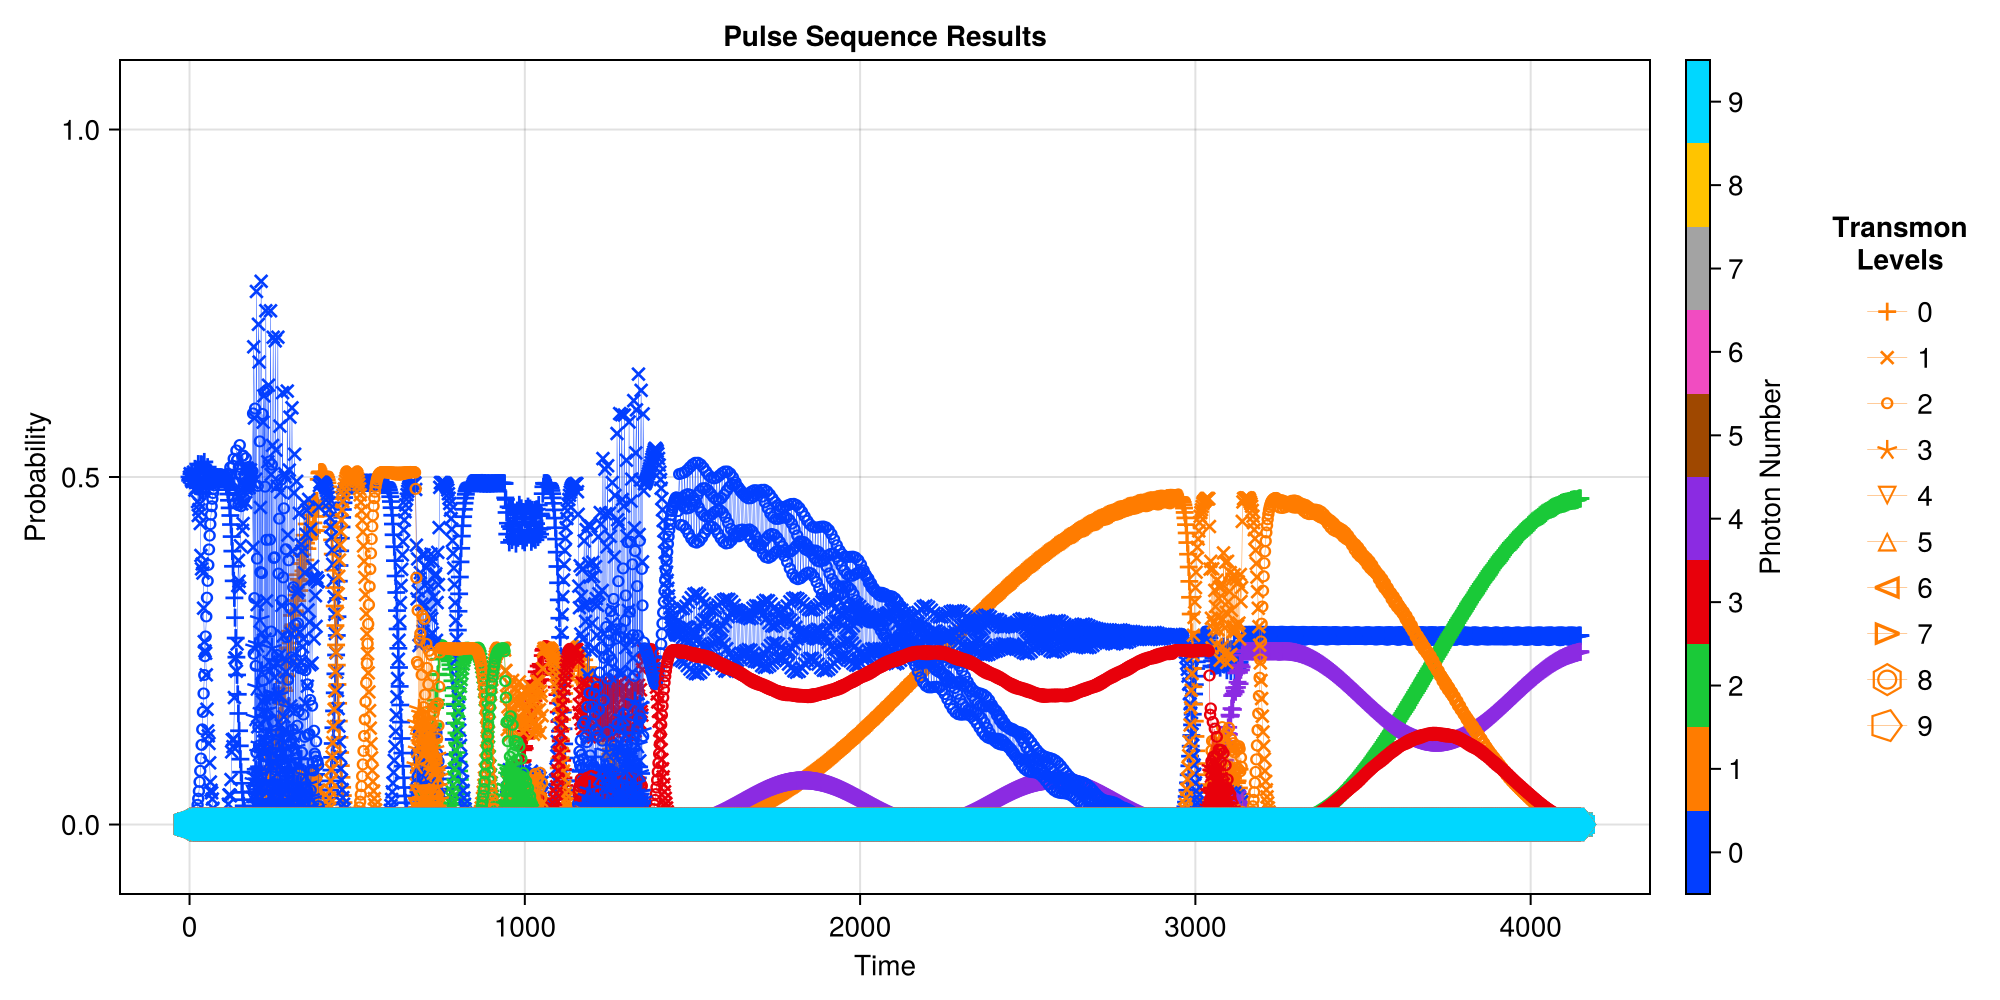

CairoMakie.Screen{IMAGE}


In [ ]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, res_g_m_e["times"], EVs_g_m_e, plot_every = 10)

In [ ]:
println("Prob of |00>: $(EVs_g_m_e[(0,0)][end])")
println("Prob of |02>: $(EVs_g_m_e[(0,2)][end])")
println("Prob of |04>: $(EVs_g_m_e[(0,4)][end])")
println(EVs_g_m_e[(0,4)][end]+EVs_g_m_e[(0,0)][end]+EVs_g_m_e[(0,2)][end])

Prob of |00>: 0.27174002114727974 - 8.667299464869167e-18im
Prob of |02>: 0.4690904898527254 - 1.1044633646955979e-16im
Prob of |04>: 0.2484799487579652 - 1.6565146816830468e-17im
0.9893104597579704 - 1.3567878275125944e-16im


### Encoding $|0,0\rangle+i|1,0\rangle$

#### Running

In [ ]:
ψi = Mode3.dressed_states[(0,0)]+1im*Mode3.dressed_states[(1,0)]
ψi = ψi/qt.norm(ψi)
res_g_p_ie = SC.Dynamics.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true)

The Name for this run is: Operator_Sequence_Thu-Nov-21-24.23.44
It is being saved at: Data/
[2024-11-21 23:44:10] Info: Running operator q_ef_0
[2024-11-21 23:44:10] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:44:11] Info: Time Evolution Complete
[2024-11-21 23:44:11] Info: Saving Steps
[2024-11-21 23:44:12] Info: Done with Step_1
[2024-11-21 23:44:12] Info: Running operator q_ge_0
[2024-11-21 23:44:12] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:44:13] Info: Time Evolution Complete
[2024-11-21 23:44:13] Info: Saving Steps
[2024-11-21 23:44:13] Info: Done with Step_2
[2024-11-21 23:44:13] Info: Running operator sb_f0g1
[2024-11-21 23:44:13] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-21 23:44:16] Info: Tim

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.199933, 0.399866, 0.599798, 0.799731, 0.999664, 1.1996…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

#### Looking at Results

In [ ]:
EVs_g_p_ie = SC.Utils.Get_EVs(res_g_p_ie["states"], proj_dict);

[2024-11-21 23:45:35] Info: Making Plot


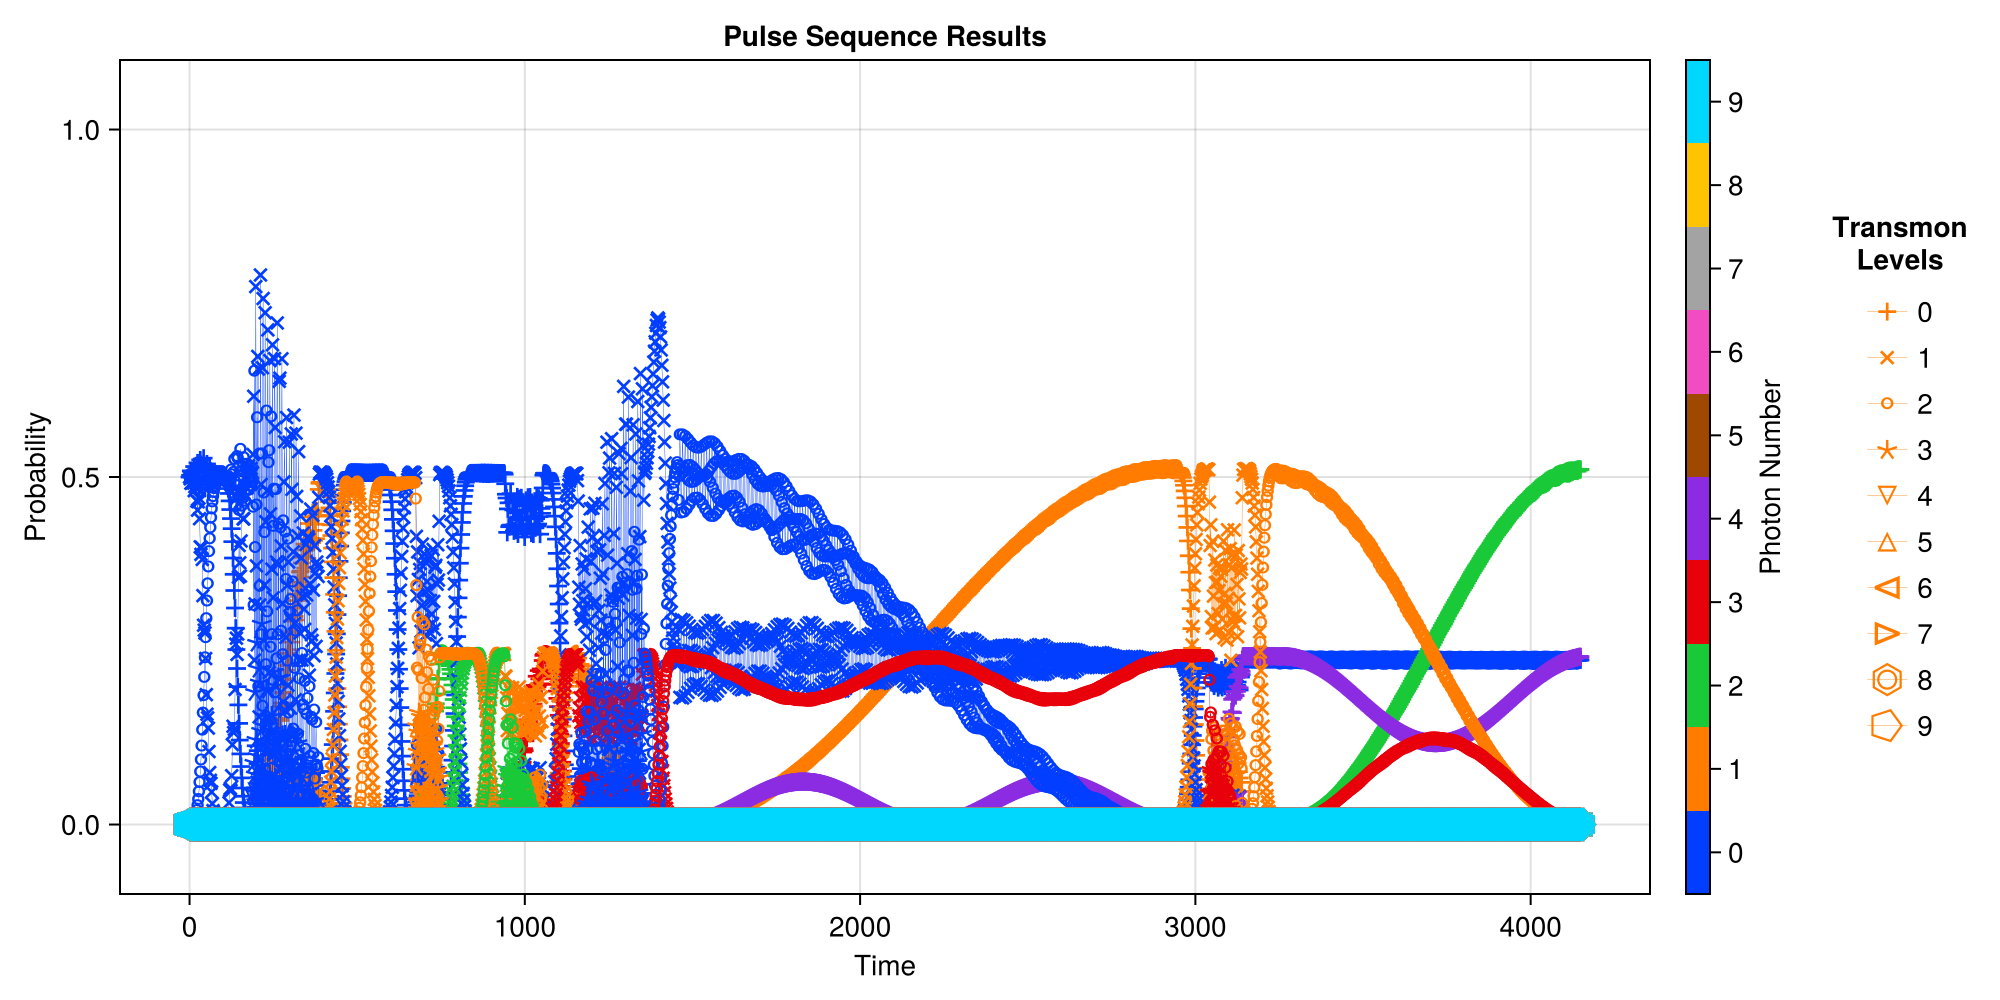

CairoMakie.Screen{IMAGE}


In [ ]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, res_g_p_ie["times"], EVs_g_p_ie, plot_every = 10)

In [ ]:
println("Prob of |00>: $(EVs_g_p_ie[(0,0)][end])")
println("Prob of |02>: $(EVs_g_p_ie[(0,2)][end])")
println("Prob of |04>: $(EVs_g_p_ie[(0,4)][end])")
println(EVs_g_p_ie[(0,4)][end]+EVs_g_p_ie[(0,0)][end]+EVs_g_p_ie[(0,2)][end])

Prob of |00>: 0.23687872775073154 + 1.0750443695857517e-17im
Prob of |02>: 0.5108605454249062 + 1.4169891766089822e-17im
Prob of |04>: 0.24139466408736004 + 2.680438431916594e-17im
0.9891339372629978 + 5.172471978111328e-17im


### Encoding $|0,0\rangle-i|1,0\rangle$

#### Running

In [ ]:
ψi = Mode3.dressed_states[(0,0)]-1im*Mode3.dressed_states[(1,0)]
ψi = ψi/qt.norm(ψi)
res_g_m_ie = SC.Dynamics.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true)

The Name for this run is: Operator_Sequence_Thu-Nov-21-24.23.45
It is being saved at: Data/
[2024-11-21 23:45:54] Info: Running operator q_ef_0
[2024-11-21 23:45:54] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:45:55] Info: Time Evolution Complete
[2024-11-21 23:45:55] Info: Saving Steps
[2024-11-21 23:45:56] Info: Done with Step_1
[2024-11-21 23:45:56] Info: Running operator q_ge_0
[2024-11-21 23:45:56] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-11-21 23:45:57] Info: Time Evolution Complete
[2024-11-21 23:45:57] Info: Saving Steps
[2024-11-21 23:45:58] Info: Done with Step_2
[2024-11-21 23:45:58] Info: Running operator sb_f0g1
[2024-11-21 23:45:58] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-21 23:46:00] Info: Tim

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.199933, 0.399866, 0.599798, 0.799731, 0.999664, 1.1996…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

#### Looking at Results

In [ ]:
EVs_g_m_ie = SC.Utils.Get_EVs(res_g_m_ie["states"], proj_dict);

[2024-11-21 23:47:23] Info: Making Plot


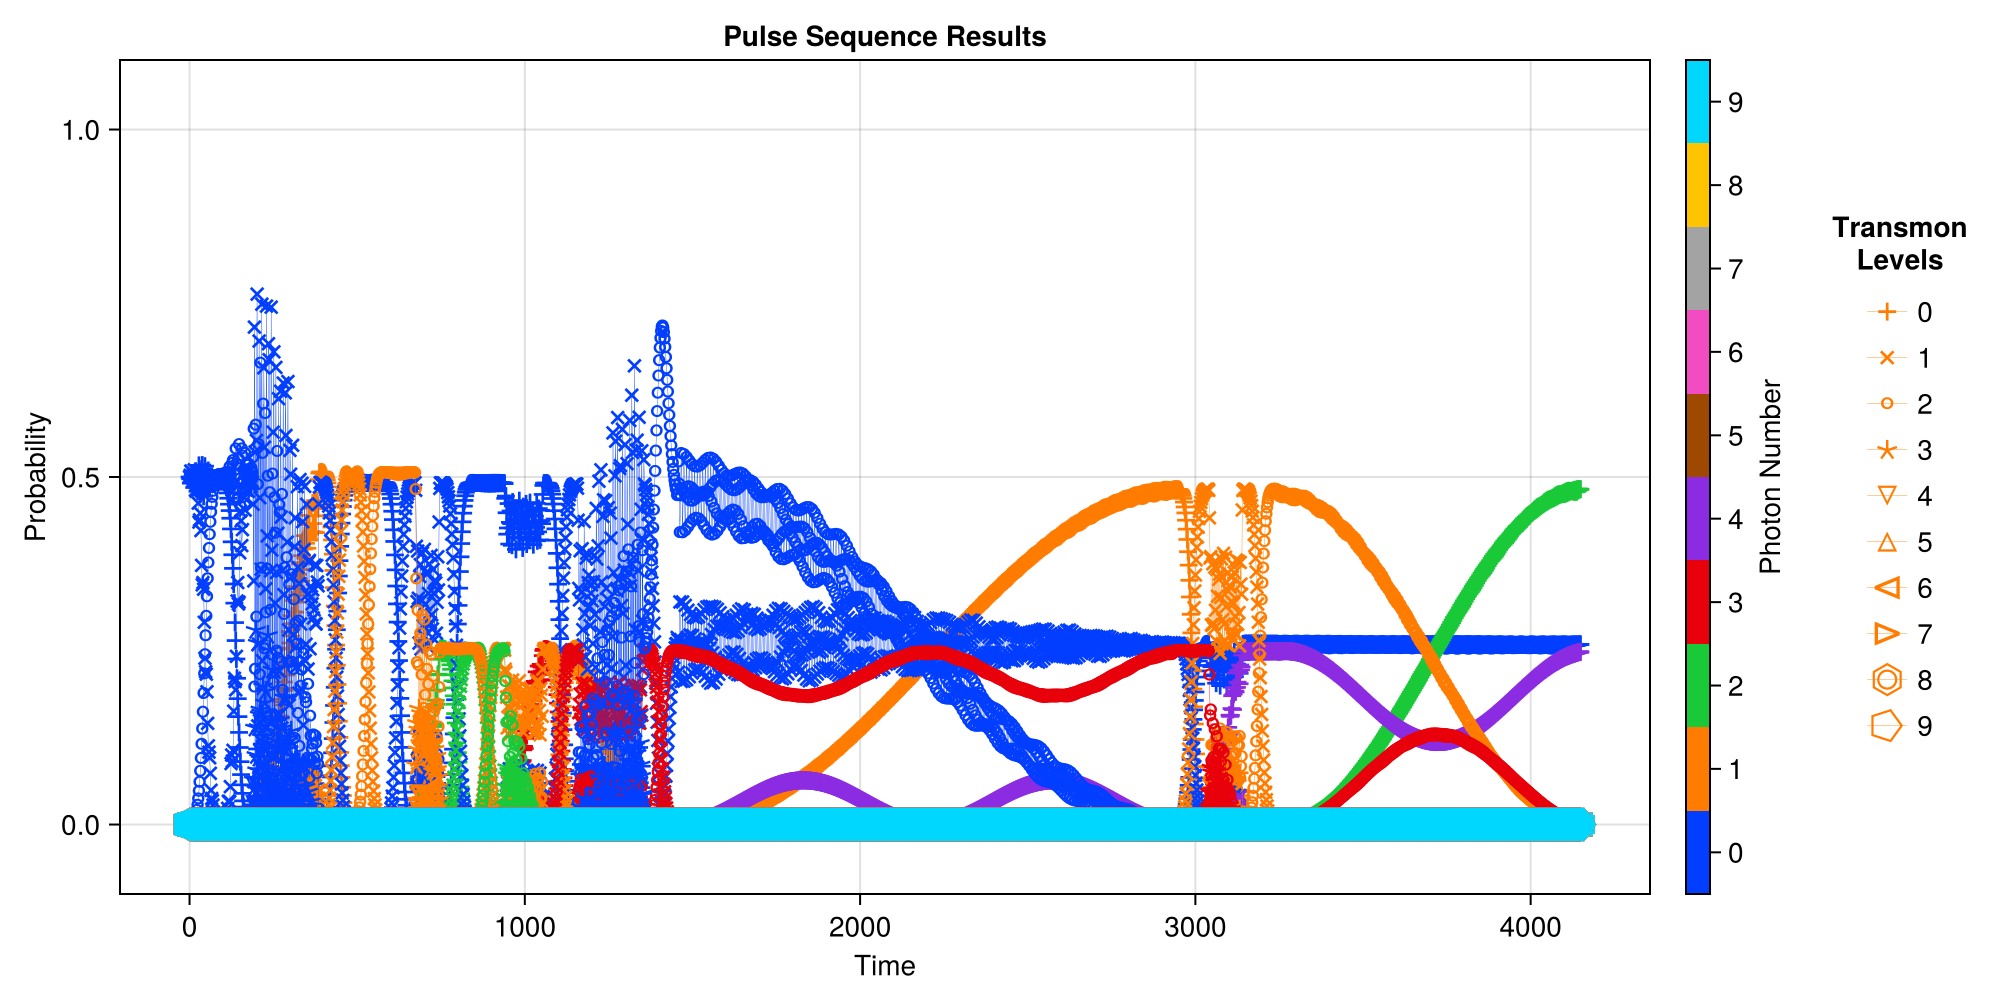

CairoMakie.Screen{IMAGE}


In [ ]:
SC.Dynamics.PlotSingleModeEvolution(Mode3, res_g_m_ie["times"], EVs_g_m_ie, plot_every = 10)

In [ ]:
println("Prob of |00>: $(EVs_g_m_ie[(0,0)][end])")
println("Prob of |02>: $(EVs_g_m_ie[(0,2)][end])")
println("Prob of |04>: $(EVs_g_m_ie[(0,4)][end])")
println(EVs_g_m_ie[(0,4)][end]+EVs_g_m_ie[(0,0)][end]+EVs_g_m_ie[(0,2)][end])

Prob of |00>: 0.25910490879894366 + 4.600586492432438e-18im
Prob of |02>: 0.4823777665120477 - 9.01781837304715e-17im
Prob of |04>: 0.2482506167543818 - 4.456580644063448e-17im
0.9897332920653732 - 1.3014340367867355e-16im
